In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [4]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
summary = {'Column': [], 'Unique Values': []}
for col in df.columns:
    summary['Column'].append(col)
    summary['Unique Values'].append(df[col].unique())
pd.DataFrame(summary)

,Column,Unique Values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,"[Female, Male]"
2,SeniorCitizen,"[0, 1]"
3,Partner,"[Yes, No]"
4,Dependents,"[No, Yes]"
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,"[No, Yes]"
7,MultipleLines,"[No phone service, No, Yes]"
8,InternetService,"[DSL, Fiber optic, No]"
9,OnlineSecurity,"[No, Yes, No internet service]"


In [7]:
# drop ID
df = df.drop(columns=["customerID"])
# label encoding of two features
# test = ['Yes', 'No']
# le = LabelEncoder()
# le.fit(test)
col_list = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in col_list:
    # df[col] = le.transform(df[col])
    df[col] = df[col].map({'Yes':1, 'No':0})
# gender
# le = LabelEncoder()
# df['gender'] = le.fit_transform(df['gender'])
df['gender'] = df['gender'].map({'Male':1, 'Female':0})
# PaymentMethod
le = LabelEncoder()
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
# more than three features
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].map({'Yes':1, 'No':0, 'No internet service':0.5})
# MultipleLines
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service':0.5})
# InternetService
df['InternetService'] = df['InternetService'].map({'DSL':2, 'No':0, 'Fiber optic':1})
# to numerical data
df['Contract'] = df['Contract'].map({'Month-to-month':1, 'One year':12, 'Two year':24})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0.5,2,0.0,1.0,0.0,0.0,0.0,0.0,1,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,12,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,1,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0.5,2,1.0,0.0,1.0,1.0,0.0,0.0,12,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,70.70,151.65,1


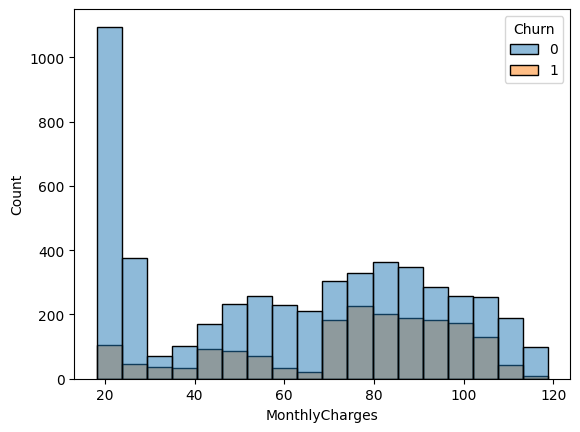

In [8]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn')
# sns.histplot(data=df, x='TotalCharges', hue='Churn')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int32  


In [10]:
(df['MonthlyCharges']==' ').sum()

0

In [11]:
(df['TotalCharges']==' ').sum()

11

In [12]:
df = df[df['TotalCharges'] != ' '].reset_index(drop=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   float64
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   float64
 9   OnlineBackup      7032 non-null   float64
 10  DeviceProtection  7032 non-null   float64
 11  TechSupport       7032 non-null   float64
 12  StreamingTV       7032 non-null   float64
 13  StreamingMovies   7032 non-null   float64
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int32  


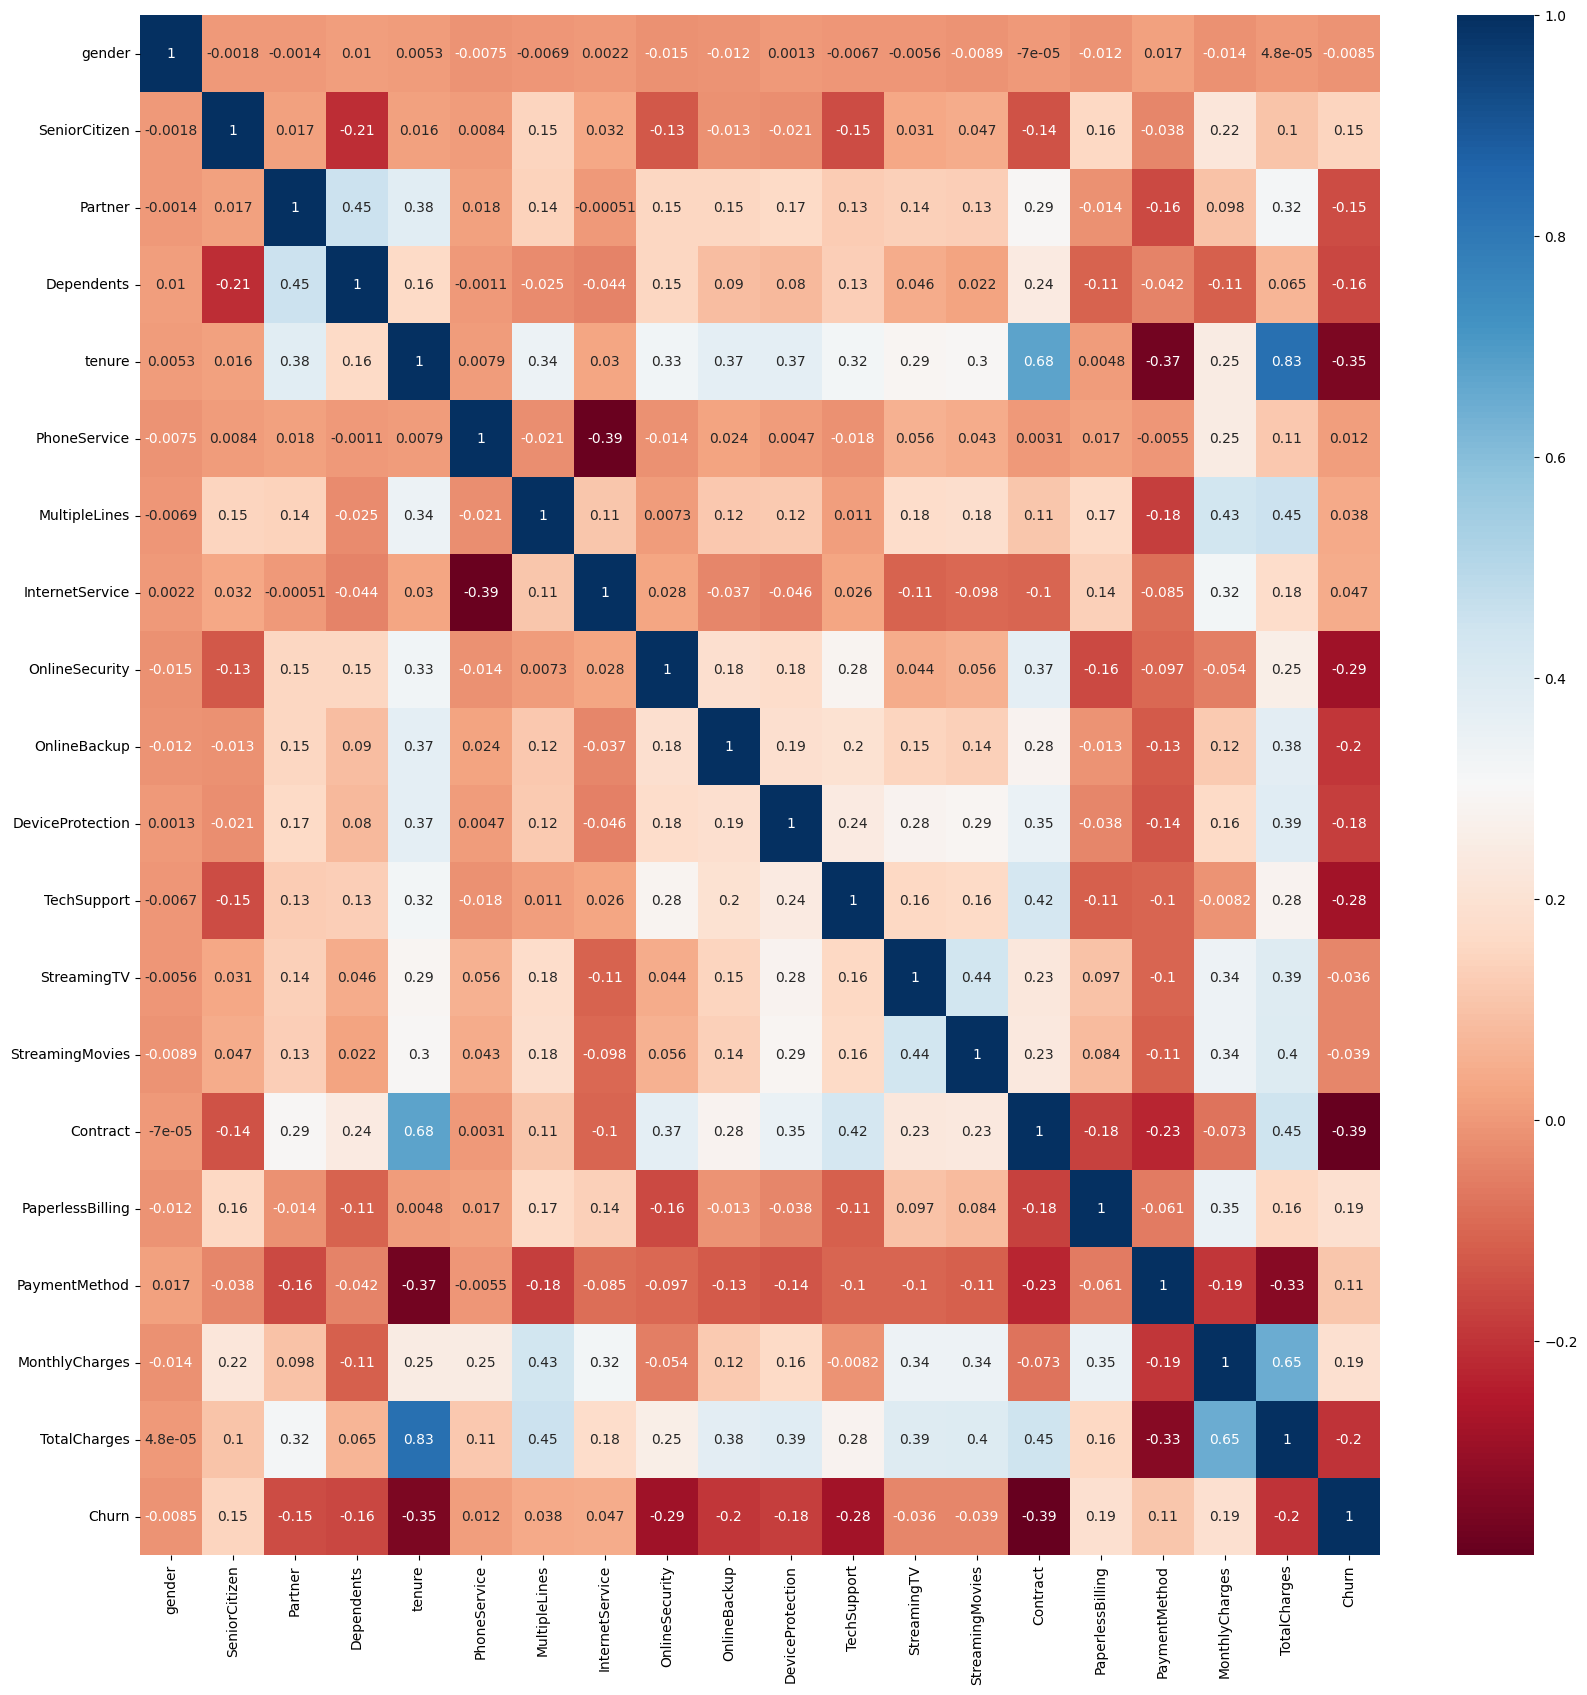

In [14]:
corr = df.corr()
fig, axs = plt.subplots()
sns.heatmap(corr, annot=True, cmap="RdBu") # annot=True
fig.set_size_inches(20,20)
plt.show()

-0.39388804242205583 1.0


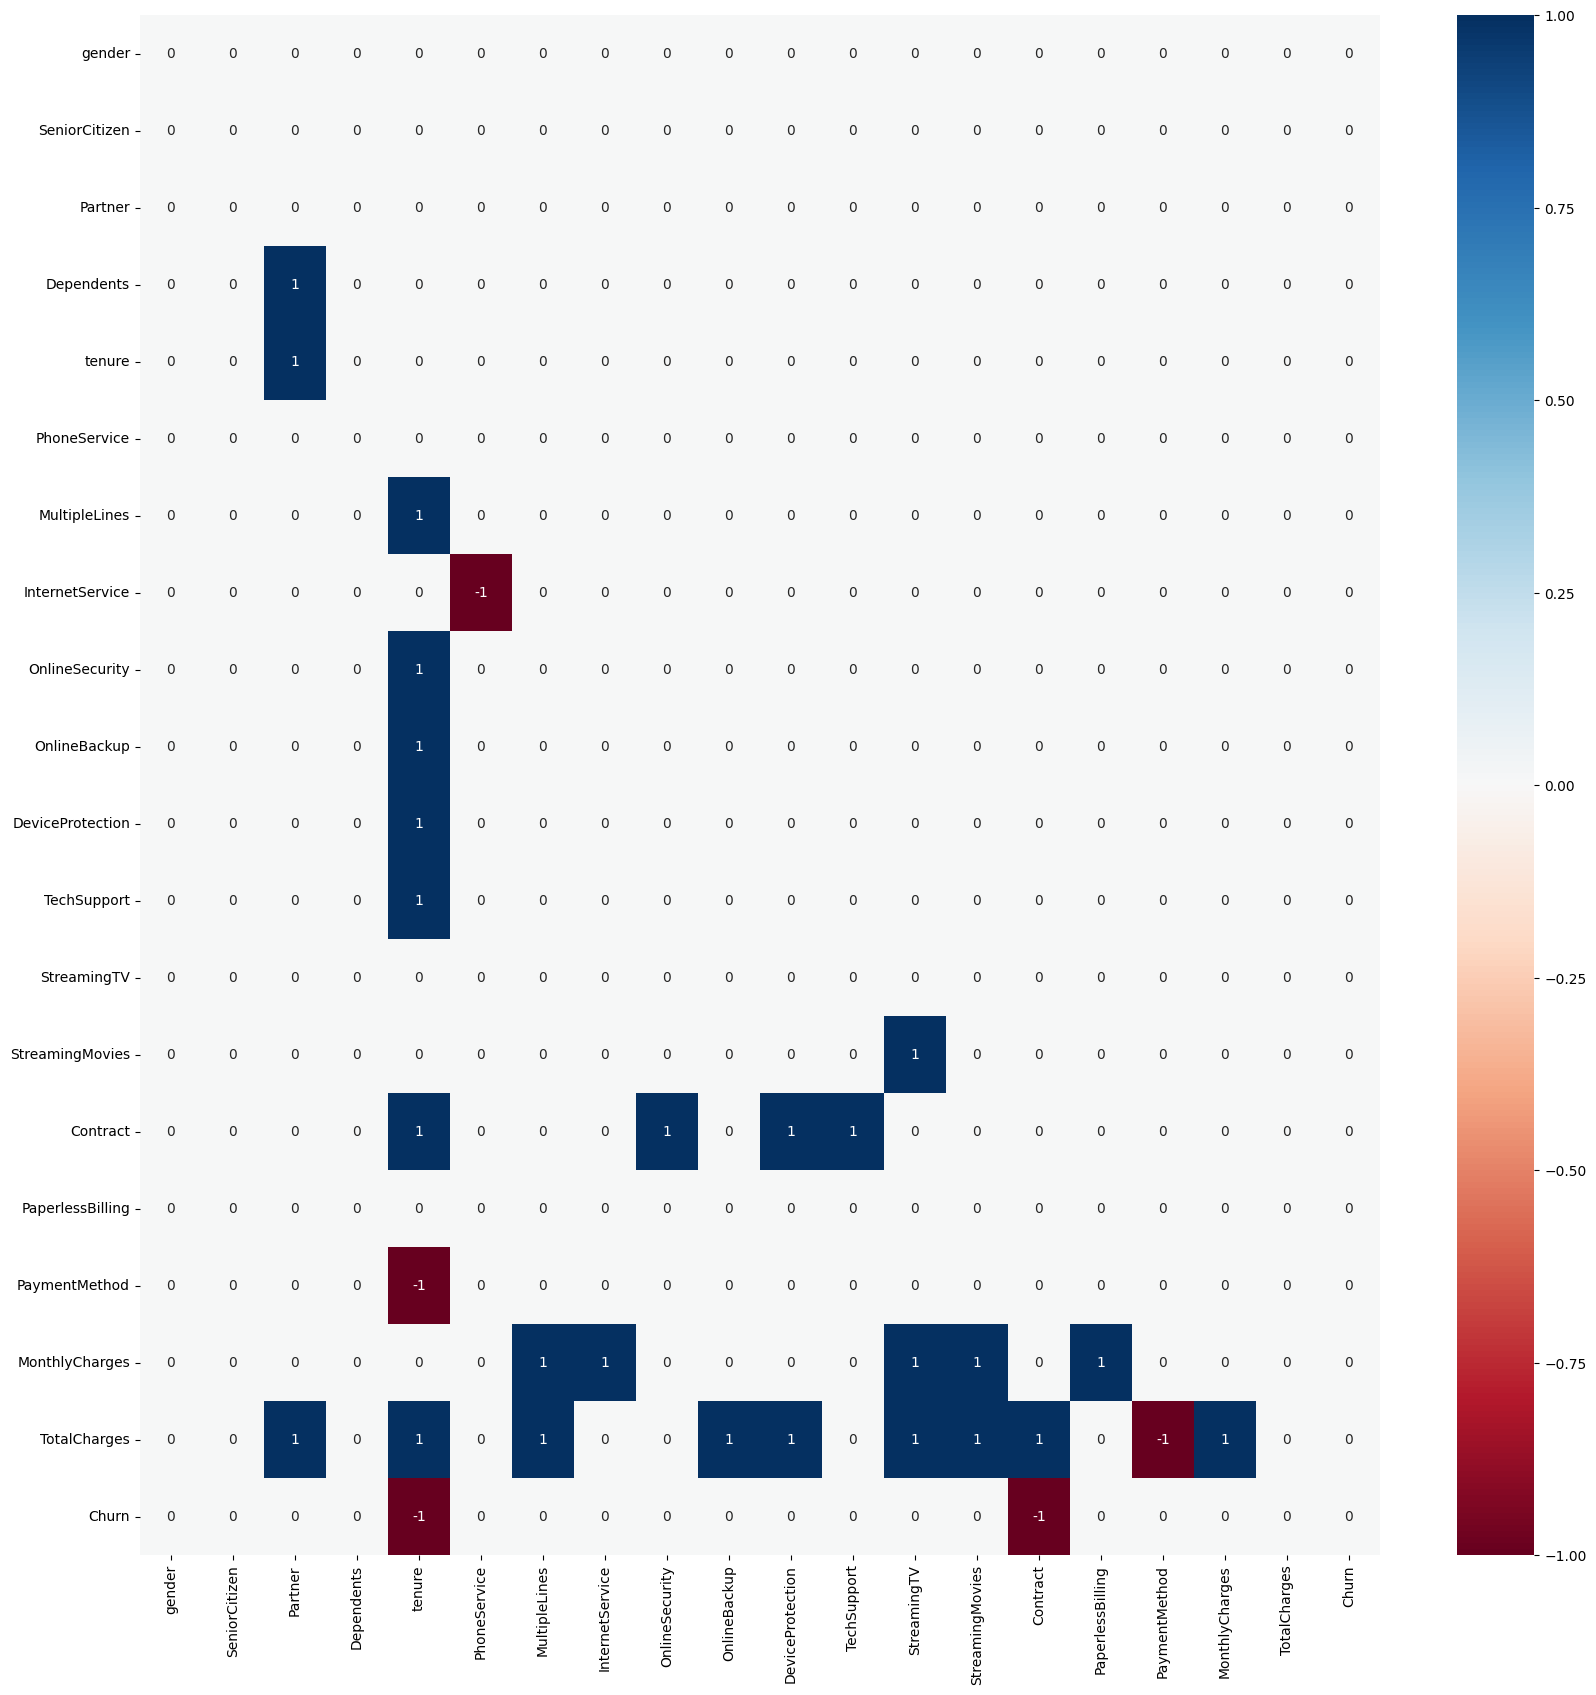

In [15]:
corr = df.corr()
print(corr.min().min(), corr.max().max())
corr = corr.apply(lambda col: col.map(lambda x: -1 if x < -0.3 else 1 if x > 0.3 else 0))
for i_idx, i in enumerate(corr.index):
    for j_idx, j in enumerate(corr.columns):
        if i_idx <= j_idx:
            corr.loc[i, j] = 0
fig, axs = plt.subplots()
sns.heatmap(corr, annot=True, cmap="RdBu") # annot=True
fig.set_size_inches(20,20)
plt.show()

In [16]:
fig.savefig('churn_corr_heatmap.png')

In [17]:
triples = [
    (row, col, corr.loc[row, col])
    for i, row in enumerate(corr.index)
    for j, col in enumerate(corr.columns)
    if i < j and corr.loc[row, col] in [-1, 1]
]

significant_corrs = pd.DataFrame(triples, columns=['Row', 'Column', 'Value'])
significant_corrs.sort_values(by='Value', ascending=True)

,Row,Column,Value


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0.5,2,0.0,1.0,0.0,0.0,0.0,0.0,1,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,12,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,1,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0.5,2,1.0,0.0,1.0,1.0,0.0,0.0,12,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,70.70,151.65,1


In [19]:
mm = MinMaxScaler()
mm.fit(df)
scaled_df = mm.transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.666667,0.115423,0.001275,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.478261,0.0,1.000000,0.385075,0.215867,0.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.000000,0.354229,0.010310,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.478261,0.0,0.000000,0.239303,0.210241,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.666667,0.521891,0.015330,1.0


In [20]:
to_int_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for elem in to_int_var:
    scaled_df[elem] = scaled_df[elem].astype(int)

In [21]:
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1,0.666667,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.478261,0,1.000000,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1,1.000000,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0.5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.478261,0,0.000000,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0.666667,0.521891,0.015330,1


In [22]:
# split data
X = scaled_df.drop(columns=['Churn'])
X_list = X.values.tolist()
Y = scaled_df['Churn'].to_numpy()
# x_train, x_test, y_train, y_target = train_test_split(data, target, test_size=0.3, random_state=42)

In [26]:
# PCA to visualize the data
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_list)

PC1: 0.20
PC2: 0.12
PC3: 0.08
PC4: 0.08
PC5: 0.07


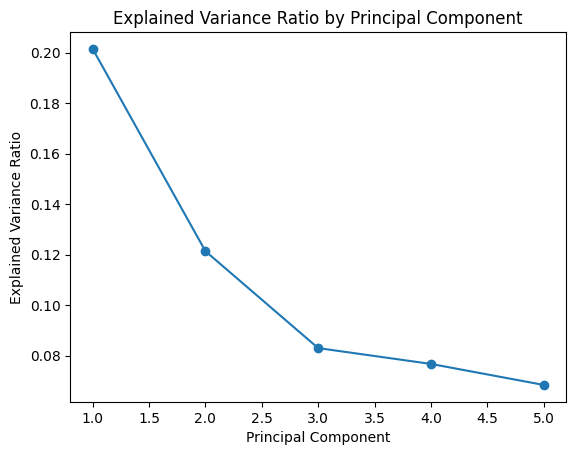

In [27]:
# access explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
for indx, evr in enumerate(explained_variance_ratio):
    print(f"PC{indx+1}: {evr:.2f}")

fig, ax = plt.subplots()
x = np.arange(1, len(explained_variance_ratio) + 1)
y = explained_variance_ratio
ax.plot(x, y, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratio by Principal Component')
plt.show()

In [28]:
# PCA to visualize the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_list)

In [29]:
def power_method(A, num_iter=200, tol=1e-6):
    n = A.shape[0]
    x = np.ones(n)

    for _ in range(num_iter):
        x = A @ x
        x_norm = np.linalg.norm(x)
        x_next = x / x_norm

        # stopping criterion
        if np.linalg.norm(x_next - x) < tol:
            break
        x = x_next

    eig_val = (x.T @ (A @ x)) / (x.T @ x)
    return eig_val, x

def deflate(A, eig_val, eig_vec):
    return A - eig_val * np.outer(eig_vec, eig_vec)

# matrices
A = np.exp(-pairwise_distances(X, metric='euclidean'))
D = np.diag(np.sum(A, axis=1))
L = D - A
L_inv = np.linalg.inv(L + np.eye(L.shape[0]) * 1e-6)
L_inv_norm = L_inv / np.linalg.norm(L_inv)

# power and deflation methods
def_val = []
def_vec = []
def_mat = L_inv

num_eig_pair = 3 # for the binary classification

for i in range(num_eig_pair):  
    eig_val, eig_vec = power_method(def_mat)
    def_val.append(eig_val)
    def_vec.append(eig_vec)
    def_mat = deflate(def_mat, eig_val, eig_vec)

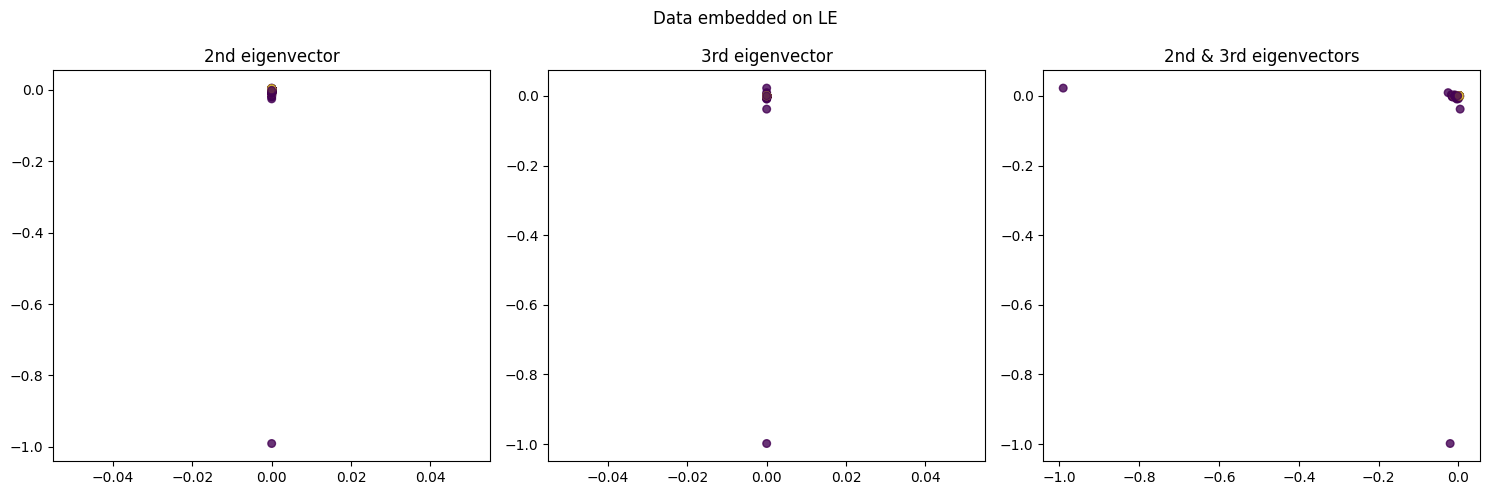

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(np.zeros(len(def_vec[1])), def_vec[1], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[0].set_title('2nd eigenvector')

axs[1].scatter(np.zeros(len(def_vec[2])), def_vec[2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[1].set_title('3rd eigenvector')

axs[2].scatter(def_vec[1], def_vec[2], c=Y, cmap='viridis', s=30, alpha=0.8)
axs[2].set_title('2nd & 3rd eigenvectors')

fig.suptitle('Data embedded on LE')
plt.tight_layout()
plt.show()